### Overview of Simple Logistic Regression

Simple logistic regression is a statistical method used to model the relationship between a binary dependent variable and a single independent variable. It is used to predict the probability of a binary outcome (e.g., success/failure, yes/no, 0/1) based on one predictor variable.

#### Mathematical Model

The logistic regression model is based on the logistic function (also known as the sigmoid function), which maps any real-valued number into the range [0, 1]. The logistic function is defined as:

$$
\text{P}(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

where:
- $P(Y=1|X)$ is the probability that the dependent variable $Y$ equals 1 given the independent variable $X$.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient of the independent variable $X$.
- $e$ is the base of the natural logarithm.

#### Objective

The objective of logistic regression is to estimate the coefficients ($\beta_0$ and $\beta_1$) that maximize the likelihood of observing the given data. This is done using the method of maximum likelihood estimation (MLE).

### Example

Let's consider a simple example where we want to predict whether a student will pass or fail an exam based on the number of hours studied:

|Hours Studied| 1| 2| 3| 4| 5|
|---|---|---|---|---|---|
|Pass (1) / Fail (0)| 0| 0| 0| 1| 1|
---




We want to model the relationship between the number of hours studied and the probability of passing the exam.

1. **Plot the Data**: Visualize the data points on a scatter plot.
2. **Fit the Model**: Use logistic regression to find the best-fitting curve.
3. **Equation**: The resulting logistic regression equation might be:
   $$
   \text{P}(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
   $$

### Use Cases

Simple logistic regression is widely used in various fields to model binary outcomes. Some common use cases include:

1. **Medical Diagnosis**:
   - **Example**: Predicting whether a patient has a disease based on diagnostic test results.
   - **Use**: Helps in early detection and treatment planning.

2. **Credit Scoring**:
   - **Example**: Predicting whether a loan applicant will default based on credit history.
   - **Use**: Helps financial institutions assess risk and make lending decisions.

3. **Marketing**:
   - **Example**: Predicting whether a customer will buy a product based on demographic information.
   - **Use**: Helps businesses target marketing efforts and improve conversion rates.

4. **Human Resources**:
   - **Example**: Predicting whether an employee will leave the company based on job satisfaction and other factors.
   - **Use**: Helps organizations implement retention strategies.

5. **Elections**:
   - **Example**: Predicting whether a voter will vote for a particular candidate based on survey responses.
   - **Use**: Helps political campaigns understand voter behavior and tailor their strategies.

### Conclusion

Simple logistic regression is a powerful statistical tool for modeling and predicting binary outcomes. By understanding the underlying theory and practical applications, practitioners can effectively use logistic regression to uncover insights and make informed decisions based on their data.




This example demonstrates how to generate synthetic data, fit a logistic regression model, and visualize the results in a scatter plot with the logistic regression curve.

# Loss function: Maximum Likelihood Estimation
  $$L(w) = -1/N * \sum_{i=1}^{N}( y_i*log(\hat{y_i}) + (1-y_i)*log(1-\hat{y_i}) )$$
  where,
  - $\hat{y_i} = 1.0 / (1.0 + exp(-z_i))$
  - $z = (\beta_0 + \beta_1x)$

To solve the issue of floating point underflow, we can use the following
- trick:
    - $y = log(1.0 / (1.0 + exp(-z)))$   
    - and to multiply use addition in log domain.

In [14]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return "x: " + str(self.x) + ", y: " + str(self.y)

In [15]:
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-b0 - b1 * x))
    return p

In [16]:
import numpy as np

def build_model(points):
    b0 = 0.01  # Logistic function dont like 0 so we start with a small value
    b1 = 0.01
    best_likelihood = -1000000

    epoch = 10000

    for i in range(epoch):
        # select b0 or b1 randomaly and adjust it randomly
        random_b = np.random.choice([0, 1])
        random_adjust = np.random.normal()

        if random_b == 0:
            b0 += random_adjust
        else:
            b1 += random_adjust

        # calculate the loss (log likelihood)
        true_estimates = sum(
            math.log(predict_probability(p.x, b0, b1)) for p in points if p.y == 1.0
        )
        false_estimate = sum(
            math.log(1 - predict_probability(p.x, b0, b1))
            for p in points
            if p.y == 0.0
        )
        total_likelihood = true_estimates + false_estimate

        # if likelihood is greater than previous likelihood, keep the changes
        if best_likelihood < total_likelihood:
            best_likelihood = total_likelihood
        else:
            if random_b == 0:
                b0 -= random_adjust
            else:
                b1 -= random_adjust
    return b0, b1

In [17]:
import matplotlib.pyplot as plt

def plot(points, b0, b1):

    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.scatter(x, y)

    x = np.linspace(min(x), max(x), 100)
    y = [predict_probability(i, b0, b1) for i in x]
    plt.plot(x, y, color="red")
    plt.show()

In [18]:
import pandas as pd

def generate_samples() -> pd.DataFrame:
    # Generate synthetic data for logistic regression
    np.random.seed(0)
    n_samples = 100
    x = np.random.uniform(0, 10, n_samples)  # Predictor variable
    # Logistic function to generate binary outcomes
    y = (x > 5).astype(int)  # Binary outcome based on a threshold

    # Add some noise to make the data more realistic
    y = (np.random.rand(n_samples) < (1 / (1 + np.exp(-(x - 5))))).astype(int)

    # Create a DataFrame
    df = pd.DataFrame({'x': x, 'y': y})
    return df

y = 1.0 / (1.0 + exp(-(-5.052485091646577 + 1.0231377541591735*x))


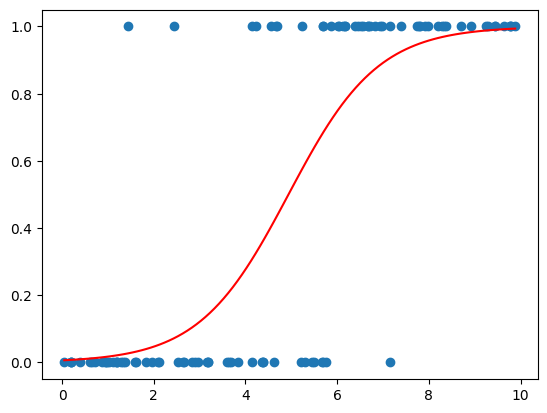

In [19]:
if __name__ == "__main__":
    df = generate_samples()
    points = [
        Point(row.x, row.y) for index, row in df.iterrows()]
    b0, b1 = build_model(points)
    print(f'y = 1.0 / (1.0 + exp(-({b0} + {b1}*x))')
    plot(points, b0, b1)